In [33]:
import numpy as np
np.random.seed(42)
from scipy.stats import loguniform
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import os
import io
import warnings
#sklearn imports
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression,RidgeClassifier
from sklearn.metrics import hinge_loss
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,precision_recall_curve
from sklearn.metrics import precision_score,recall_score,classification_report
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_predict,cross_validate,GridSearchCV
from pprint import pprint
import pandas as pd

## Handwritten digit classification 

First we will build a binary classification model and then extend it to multiclass classification

In [2]:
X,y = fetch_openml('mnist_784',version=1,return_X_y=True)


Now as we have imported our data, before working on them first let's convert them to numpy array

In [3]:
X_array = X.to_numpy()
y_array = y.to_numpy()

Let's have a look at the images

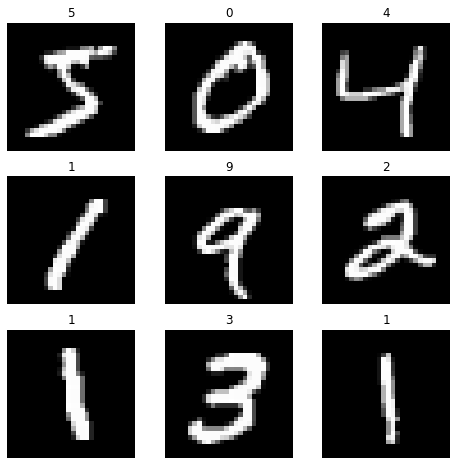

In [23]:
num_images = 9
factor = np.int64(np.sqrt(num_images))
fig,axes = plt.subplots(factor,factor,figsize=(8,8))
idx_offset = 0
for i in range(factor):
    index = idx_offset+i*factor
    for j in range(factor):
        axes[i,j].imshow(X_array[index+j].reshape(28,28),cmap='gray')
        axes[i,j].set_title(y[index+j])
        axes[i,j].set_axis_off()

In [4]:
#for sanity check 
print(X_array.shape,y_array.shape)
print(type(X_array),type(y_array))

(70000, 784) (70000,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


#### Preprocessing

- Sigmoid function requires scaling , so we will scale the features from 0 to 1
- Since there is only one preprocessing step we will not consider making a pipeline

In [62]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_array)

In [17]:
print('target names:',np.unique(y_array))

target names: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


As we are done with preprocessing and now let's split the data into training and test set

In [63]:
X_train,X_test,y_train,y_test = X_scaled[:60000],X_scaled[60000:],y_array[:60000],y_array[60000:]

In [64]:
#again for sanity check let's see the dimensions of the data
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)


(60000, 784) (60000,)
(10000, 784) (10000,)


Now to convert this problem to a binary classification problem we will convert all the labels to 0 and 1
- 1 if value is 0
- 0 if value is 1

In [65]:
y_train_0 = 1*np.zeros(y_train.shape)
y_test_0 = 1*np.zeros(y_test.shape)
#now all labels are 1
indx_0 = np.where(y_train=='0')
y_train_0[indx_0] = 1
indx_0 = np.where(y_test=='0')
y_test_0[indx_0] = 1

In [66]:
print(y_train[:10])

print(y_train_0[:10])

# look at the output and see convesion is fdone correctly or not

['5' '0' '4' '1' '9' '2' '1' '3' '1' '4']
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


First we will try to train the model without regularization, hence we will set alpha to 0, and loss to log to perform logistic regression


In [67]:
bin_clf_sgd = SGDClassifier(loss = 'log' ,penalty ='l2',max_iter =1, warm_start = True,eta0 = 0.01,alpha = 0,learning_rate = 'constant',random_state = 42)

In [68]:
loss = []
iterations = 100
for i in range(iterations):
    bin_clf_sgd.fit(X_train,y_train_0)
    y_pred = bin_clf_sgd.predict_proba(X_train)
    loss.append(log_loss(y_train_0,y_pred))


c:\Users\dsudi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\dsudi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\dsudi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\dsudi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consid

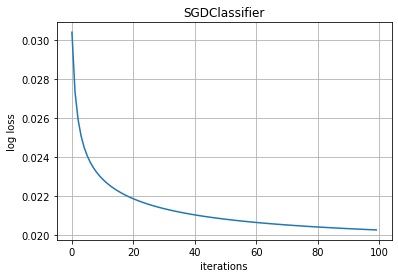

In [69]:
plt.figure()
plt.plot(np.arange(iterations),loss)
plt.grid(True)
plt.xlabel('iterations')
plt.ylabel('log loss')
plt.title('SGDClassifier')
plt.show()

As training is done let's check the performance of the model on the test set

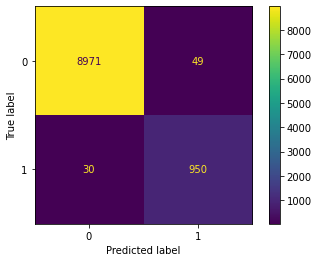

In [74]:
y_predicted = bin_clf_sgd.predict(X_test)
cm_display = ConfusionMatrixDisplay.from_predictions(y_test_0,y_predicted,labels=[0,1],values_format='.5g')

plt.show()

In [75]:
print(classification_report(y_test_0,y_predicted))

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      9020
         1.0       0.95      0.97      0.96       980

    accuracy                           0.99     10000
   macro avg       0.97      0.98      0.98     10000
weighted avg       0.99      0.99      0.99     10000

